### Importing Libraries

In [19]:
import os
os.chdir('D:/Uddhav/DATA SCIENCE/EDA Projets')

import pandas as pd
pd.set_option('display.max_column',None)

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2, chi2_contingency

df = pd.read_csv('insuranceEDA_1.csv')
df = pd.DataFrame(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   ChLH      1338 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 83.8+ KB


### Null value Treatment

In [6]:
df.isnull().sum()

id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
ChLH        0
dtype: int64

<AxesSubplot:>

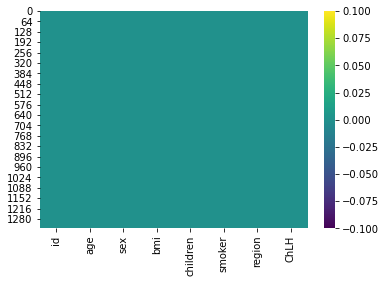

In [7]:
sns.heatmap(df.isnull(), cmap = 'viridis')

### Selecting Target Variable

In [11]:
df.ChLH.value_counts()

H    669
L    669
Name: ChLH, dtype: int64

In [12]:
df.ChLH.value_counts().sum()

1338

<AxesSubplot:xlabel='ChLH', ylabel='count'>

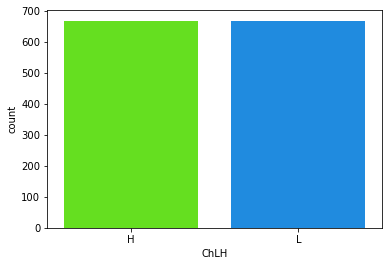

In [20]:
# Bar plot for ChLH

sns.countplot(df.ChLH, palette='gist_rainbow')

### Analysis for 1st column

In [21]:
df.id.value_counts()

2048    1
1608    1
1606    1
1605    1
1604    1
       ..
1155    1
1154    1
1153    1
1152    1
2047    1
Name: id, Length: 1338, dtype: int64

In [22]:
df.id.value_counts().sum()

1338

<AxesSubplot:xlabel='id'>

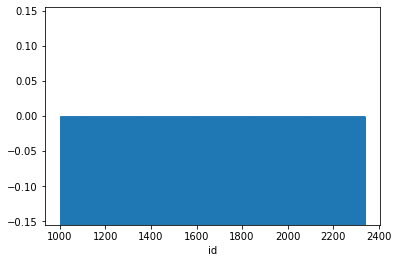

In [27]:
sns.rugplot(df.id, height=0.5)

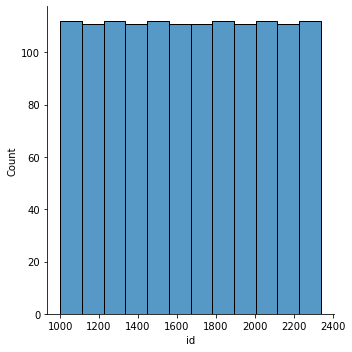

In [28]:
sns.displot(df.id)

<AxesSubplot:xlabel='id', ylabel='Density'>

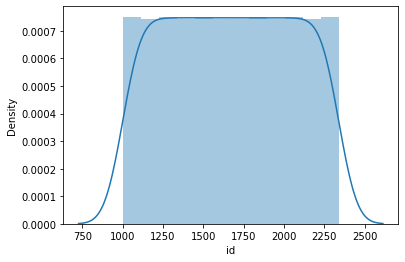

In [29]:
sns.distplot(df.id)

<AxesSubplot:xlabel='id'>

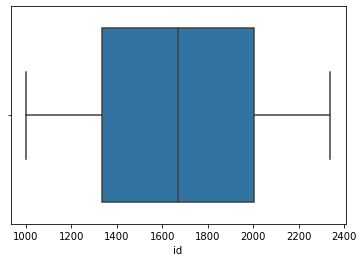

In [30]:
sns.boxplot(df.id)

In [31]:
df.id.groupby(df.ChLH).describe()

,count,mean,std,min,25%,50%,75%,max
ChLH,,,,,,,,
H,669.0,1666.816143,385.561796,1001.0,1332.0,1665.0,2010.0,2338.0
L,669.0,1672.183857,387.489580,1002.0,1348.0,1673.0,1997.0,2337.0


Text(0.5, 1.0, 'ChLH vs IDs')

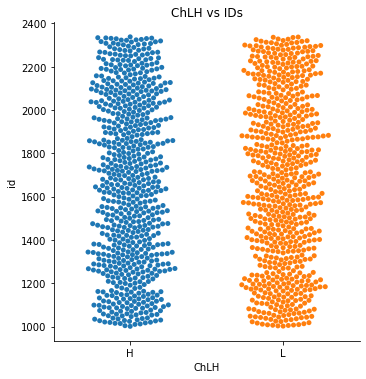

In [2]:
sns.catplot(x='ChLH', y='id', kind='swarm', data=df)
plt.title('ChLH vs IDs')

### Checking if IDs a good predictor or not

In [24]:
mod = ols('id ~ ChLH', data=df).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

              df        sum_sq        mean_sq         F    PR(>F)
ChLH         1.0  9.637729e+03    9637.728700  0.064508  0.799546
Residual  1336.0  1.996025e+08  149403.036505       NaN       NaN


In [20]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

result = pairwise_tukeyhsd(df.id, df.ChLH, alpha = 0.05)
print(result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     H      L   5.3677 0.8065 -36.0917 46.8271  False
-----------------------------------------------------


#### As there is no significant statistical relation between ID and ChLH we accept the null hypothesis. And IDs is not a good predictor for our classification model.

### Checking is Age is a good Predictor or not

In [33]:
df.age.value_counts()

18    69
19    68
20    29
51    29
45    29
46    29
47    29
48    29
50    29
52    29
28    28
54    28
21    28
27    28
26    28
49    28
25    28
24    28
23    28
22    28
53    28
42    27
44    27
43    27
41    27
40    27
31    27
30    27
29    27
56    26
34    26
33    26
32    26
57    26
55    26
35    25
59    25
58    25
36    25
39    25
38    25
37    25
60    23
61    23
62    23
63    23
64    22
Name: age, dtype: int64

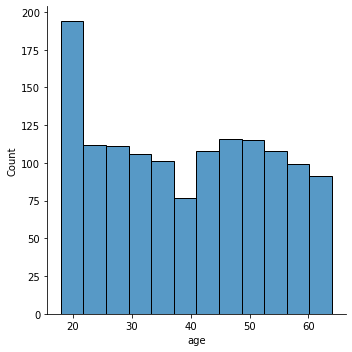

In [25]:
sns.displot(df.age)

<AxesSubplot:xlabel='age', ylabel='Density'>

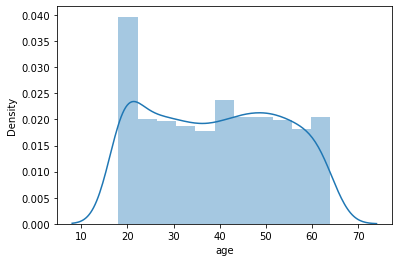

In [26]:
sns.distplot(df.age)

Text(0.5, 1.0, 'ChLH vs Age')

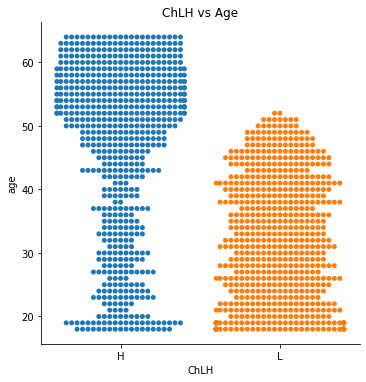

In [27]:
sns.catplot(x='ChLH', y='age', kind='swarm', data=df)
plt.title('ChLH vs Age')

In [28]:
mod = ols('age ~ ChLH', data=df).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

              df         sum_sq       mean_sq           F        PR(>F)
ChLH         1.0   69353.280269  69353.280269  476.203177  1.530278e-90
Residual  1336.0  194572.373692    145.638004         NaN           NaN


In [29]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

result = pairwise_tukeyhsd(df.age, df.ChLH, alpha = 0.05)
print(result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     H      L -14.3991 0.001 -15.6935 -13.1047   True
-----------------------------------------------------


#### There is a significant statistical difference between age and ChLH hence Age is a good predictor for our Classification modeling.

## Checking Sex is a good predictor or not

In [34]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

Text(0.5, 1.0, 'Sex vs ChLH')

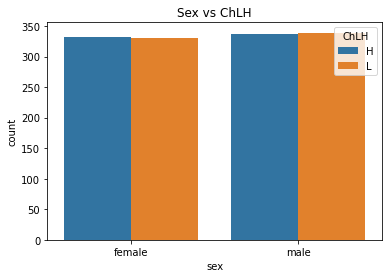

In [37]:
sns.countplot(df.sex, hue = df.ChLH)
plt.title('Sex vs ChLH')

In [38]:
ct_sex = pd.crosstab(df.sex, df.ChLH)
ct_sex

ChLH,H,L
sex,,
female,332,330
male,337,339


In [39]:
chi2_contingency(ct_sex, correction=False)

(0.011959455835821161,
 0.9129175163690894,
 1,
 array([[331., 331.],
        [338., 338.]]))

#### There is significant statistical association between sex and ChLH hence sex is not a good predictor.

## Checking for BMI

In [41]:
df.bmi.value_counts()

32.300    13
28.310     9
30.800     8
34.100     8
28.880     8
          ..
44.745     1
26.070     1
27.300     1
37.715     1
29.200     1
Name: bmi, Length: 548, dtype: int64

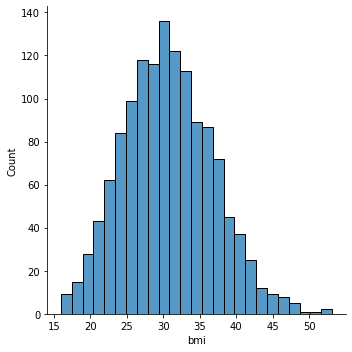

In [42]:
sns.displot(df.bmi)

<AxesSubplot:xlabel='bmi', ylabel='Density'>

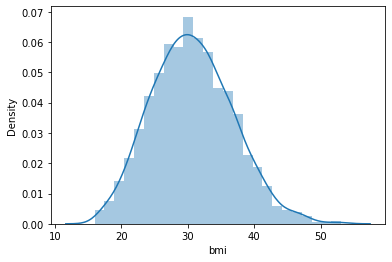

In [43]:
sns.distplot(df.bmi)

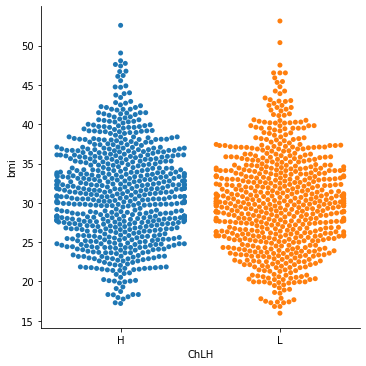

In [44]:
sns.catplot(x='ChLH', y='bmi', kind='swarm', data=df)

In [45]:
mod = ols('bmi ~ ChLH', data=df).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

              df        sum_sq     mean_sq          F    PR(>F)
ChLH         1.0    401.807848  401.807848  10.884687  0.000995
Residual  1336.0  49318.392538   36.914964        NaN       NaN


In [46]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

result = pairwise_tukeyhsd(df.bmi, df.ChLH, alpha = 0.05)
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     H      L   -1.096 0.001 -1.7477 -0.4443   True
---------------------------------------------------


#### There is a significant statistical difference between BMI and ChLH hence it is a good predictor for our model.

In [47]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<AxesSubplot:xlabel='children', ylabel='count'>

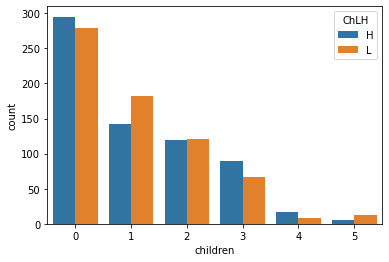

In [48]:
sns.countplot(df.children, hue=df.ChLH)

In [51]:
ct_child = pd.crosstab(df.children, df.ChLH)
ct_child

ChLH,H,L
children,,
0,295,279
1,142,182
2,119,121
3,90,67
4,17,8
5,6,12


In [52]:
chi2_contingency(ct_child, correction=False)

(14.010358054556182,
 0.015543754070689484,
 5,
 array([[287. , 287. ],
        [162. , 162. ],
        [120. , 120. ],
        [ 78.5,  78.5],
        [ 12.5,  12.5],
        [  9. ,   9. ]]))

#### There is a significant statistical difference between Children and ChLH hence it is a good predictor.

## Checking for smoker

In [54]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<AxesSubplot:xlabel='smoker', ylabel='count'>

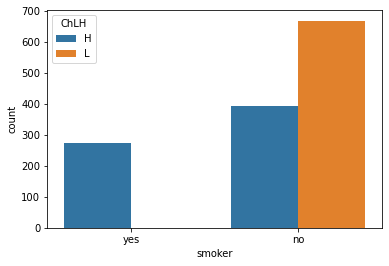

In [55]:
sns.countplot(df.smoker, hue = df.ChLH)

In [56]:
ct_smoker = pd.crosstab(df.smoker, df.ChLH)
ct_smoker

ChLH,H,L
smoker,,
no,395,669
yes,274,0


In [57]:
chi2_contingency(ct_smoker, correction=False)

(344.5601503759399,
 6.482912003699374e-77,
 1,
 array([[532., 532.],
        [137., 137.]]))

#### There is a significant statistical difference between Smoker and ChLH hence it is a good predictor.

## Checking for Region

In [59]:
df.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

<AxesSubplot:xlabel='region', ylabel='count'>

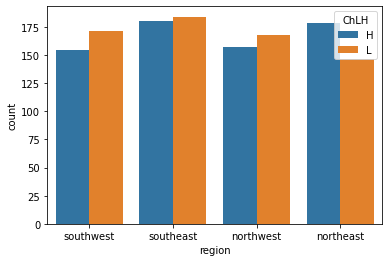

In [61]:
sns.countplot(df.region, hue = df.ChLH)

In [63]:
ct_region = pd.crosstab(df.region, df.ChLH)
ct_region

ChLH,H,L
region,,
northeast,178,146
northwest,157,168
southeast,180,184
southwest,154,171


In [64]:
chi2_contingency(ct_region, correction=False)

(4.465988332654999,
 0.21534418797301608,
 3,
 array([[162. , 162. ],
        [162.5, 162.5],
        [182. , 182. ],
        [162.5, 162.5]]))

#### There is significant statistical association between region and ChLH hence it is not a good predictor.